<a href="https://colab.research.google.com/github/awnginga/Engage-Project/blob/main/Engage_Practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
df=pd.read_excel("/content/child_data .xlsx")
df

,Age (months),Sex,Mother's education,Area,Wealth index quintile,Child's weight (kilograms)
0,45,0,1,0,0,16.2
1,45,1,0,0,1,13.5
2,36,1,0,0,2,13.4
3,51,0,0,0,2,15.0
4,56,0,0,0,2,15.2
...,...,...,...,...,...,...
763,7,0,0,1,2,8.3
764,0,1,1,1,2,3.5
765,56,0,0,1,2,15.1
766,18,0,0,1,2,10.7


In [51]:
df.head(10)

,Age (months),Sex,Mother's education,Area,Wealth index quintile,Child's weight (kilograms)
0,45,0,1,0,0,16.2
1,45,1,0,0,1,13.5
2,36,1,0,0,2,13.4
3,51,0,0,0,2,15.0
4,56,0,0,0,2,15.2
5,20,0,0,0,2,9.9
6,4,0,0,0,2,7.1
7,27,1,0,0,0,13.8
8,39,1,0,0,3,12.7
9,18,0,0,0,3,8.2


In [52]:
df.describe()

,Age (months),Sex,Mother's education,Area,Wealth index quintile,Child's weight (kilograms)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,29.151042,0.494792,0.380208,0.445312,2.010417,11.593490
std,16.861367,0.500299,0.485754,0.497324,1.379642,3.408997
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.200000
25%,14.000000,0.000000,0.000000,0.000000,1.000000,9.200000
50%,30.000000,0.000000,0.000000,0.000000,2.000000,11.700000
75%,43.000000,1.000000,1.000000,1.000000,3.000000,14.125000
max,59.000000,1.000000,1.000000,1.000000,4.000000,25.000000


In [53]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scalar = StandardScaler()
df['New_Age_after_transformation'] = scalar.fit_transform(df[['Age (months)']])
df['New_Age_after_transformation']

,New_Age_after_transformation
0,0.940569
1,0.940569
2,0.406457
3,1.296644
4,1.593373
...,...
763,-1.314572
764,-1.729992
765,1.593373
766,-0.661768


In [54]:
df['New_child weight_after_transformation'] = scalar.fit_transform(df[["Child's weight (kilograms)"]])
df['New_child weight_after_transformation']

,New_child weight_after_transformation
0,1.352161
1,0.559623
2,0.530270
3,0.999922
4,1.058628
...,...
763,-0.966746
764,-2.375703
765,1.029275
766,-0.262268


In [55]:
# change the names of the colums
df.rename(columns={"Child's weight (kilograms)":"weight"},inplace=True)
df.rename(columns={"Age (months)":"Age"},inplace=True)
df


,Age,Sex,Mother's education,Area,Wealth index quintile,weight,New_Age_after_transformation,New_child weight_after_transformation
0,45,0,1,0,0,16.2,0.940569,1.352161
1,45,1,0,0,1,13.5,0.940569,0.559623
2,36,1,0,0,2,13.4,0.406457,0.530270
3,51,0,0,0,2,15.0,1.296644,0.999922
4,56,0,0,0,2,15.2,1.593373,1.058628
...,...,...,...,...,...,...,...,...
763,7,0,0,1,2,8.3,-1.314572,-0.966746
764,0,1,1,1,2,3.5,-1.729992,-2.375703
765,56,0,0,1,2,15.1,1.593373,1.029275
766,18,0,0,1,2,10.7,-0.661768,-0.262268


In [56]:
newdf=df.iloc[:,3:4]
newdf

,Area
0,0
1,0
2,0
3,0
4,0
...,...
763,1
764,1
765,1
766,1


In [57]:
df.iloc[:,[0,5]]

,Age,weight
0,45,16.2
1,45,13.5
2,36,13.4
3,51,15.0
4,56,15.2
...,...,...
763,7,8.3
764,0,3.5
765,56,15.1
766,18,10.7


In [58]:
import scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize']=15,10


<function matplotlib.pyplot.show(close=None, block=None)>

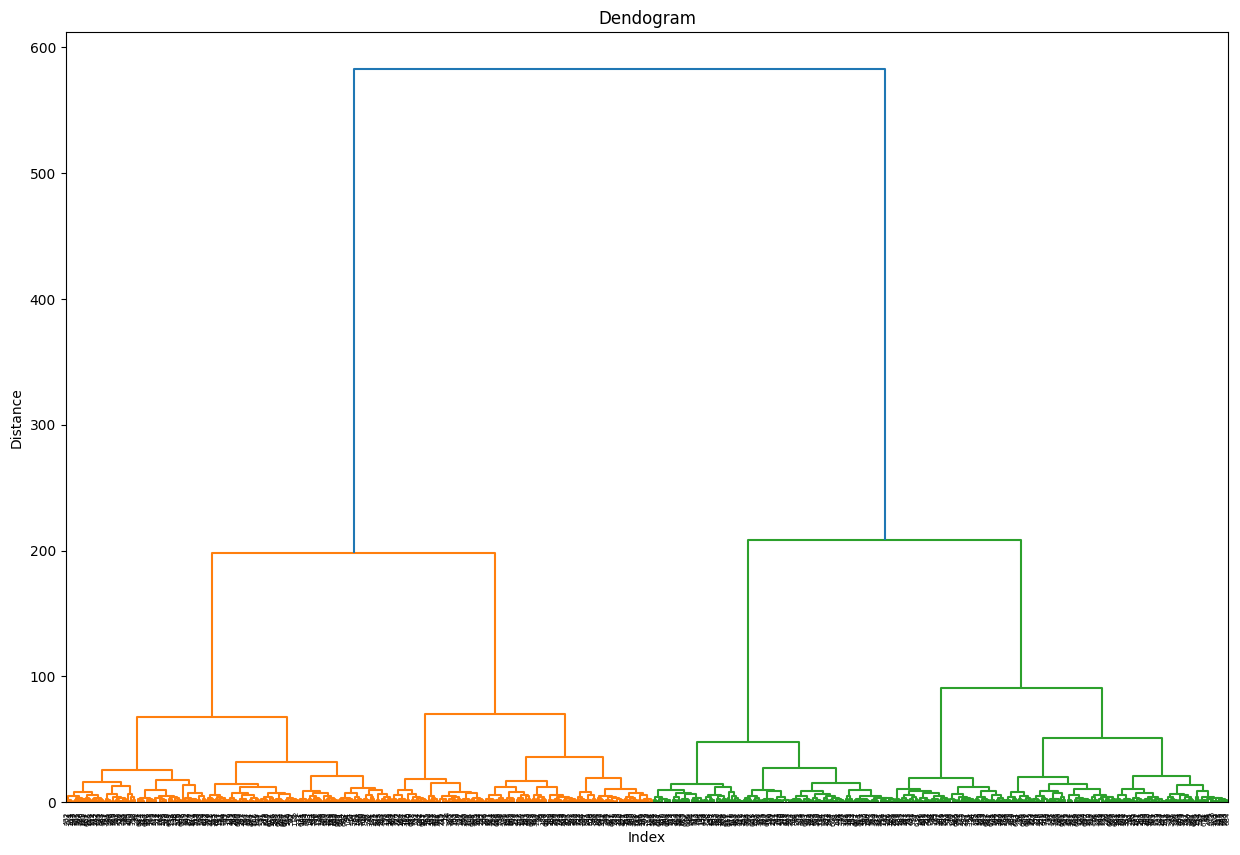

In [59]:
#using dendogram to find the optional number of cluster
import scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize']=15,10

dendogram=hc.dendrogram(hc.linkage(df,method='ward'))
plt.title('Dendogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

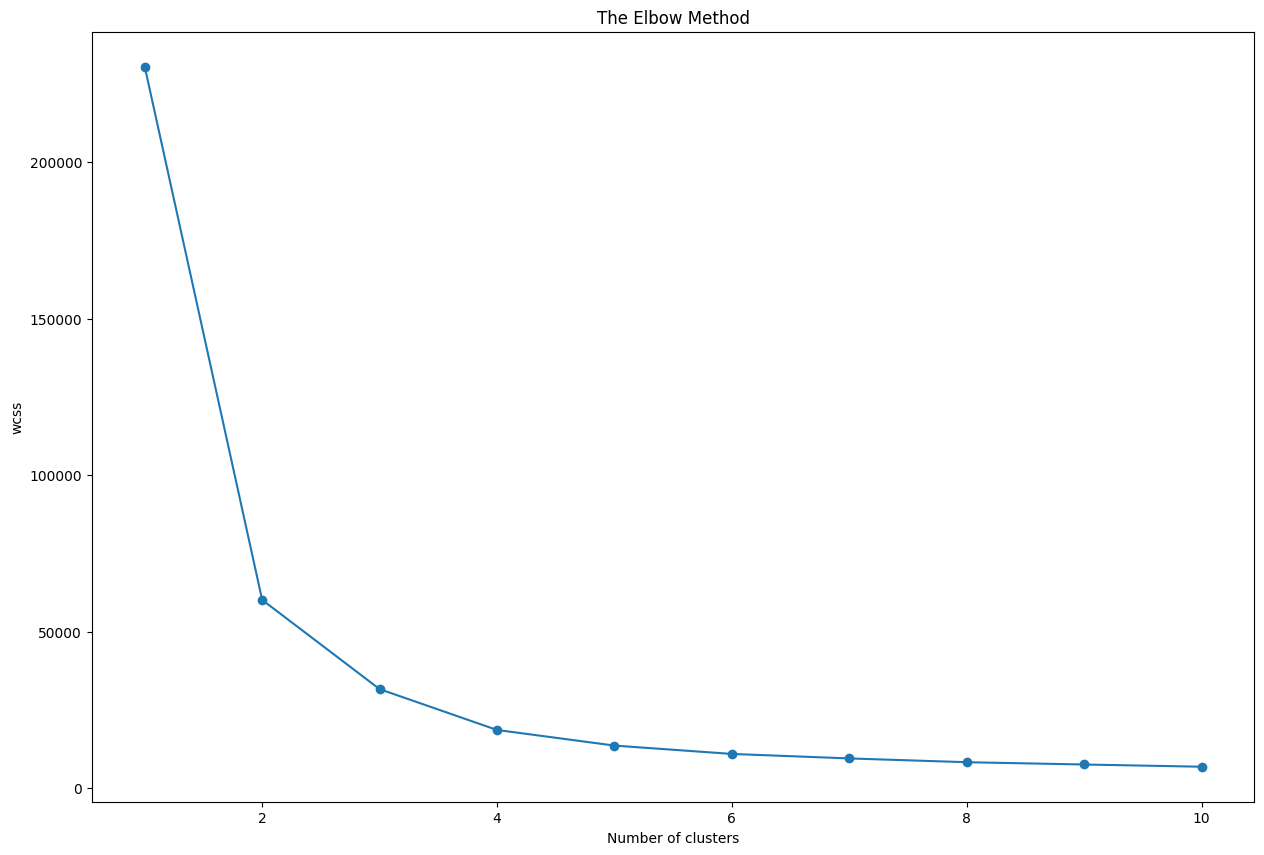

In [68]:
#Plot Elbow Method
# Import KMeans
from sklearn.cluster import KMeans

# Calculate wcss for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)  # Assuming 'df' is your DataFrame
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [69]:
y_kmeans=kmeans.fit_predict(df)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([7, 7, 8, 1, 4, 6, 2, 0, 3, 6, 4, 3, 0, 8, 9, 8, 2, 4, 3, 0, 5, 0,
       0, 5, 0, 9, 6, 9, 1, 6, 7, 7, 1, 2, 0, 7, 2, 5, 0, 3, 0, 8, 4, 1,
       8, 2, 3, 5, 6, 1, 6, 5, 8, 6, 8, 2, 8, 5, 9, 4, 0, 6, 3, 5, 3, 6,
       1, 0, 0, 5, 5, 0, 2, 8, 4, 3, 8, 8, 4, 6, 3, 0, 2, 3, 3, 8, 6, 3,
       2, 5, 9, 3, 5, 8, 8, 6, 9, 9, 8, 0, 8, 4, 4, 0, 4, 2, 1, 1, 2, 6,
       8, 9, 1, 8, 1, 8, 7, 8, 1, 3, 2, 1, 9, 1, 8, 8, 2, 4, 8, 0, 8, 7,
       5, 3, 9, 1, 1, 3, 9, 8, 4, 8, 8, 8, 8, 2, 0, 1, 2, 3, 2, 8, 4, 2,
       2, 7, 3, 1, 0, 7, 3, 0, 4, 9, 0, 0, 3, 4, 4, 7, 9, 6, 9, 0, 9, 0,
       1, 2, 0, 7, 6, 8, 7, 0, 7, 4, 9, 9, 1, 8, 2, 8, 4, 6, 6, 7, 2, 7,
       1, 6, 4, 6, 7, 1, 9, 6, 1, 1, 5, 8, 7, 6, 7, 9, 2, 4, 3, 2, 6, 3,
       5, 8, 2, 8, 3, 5, 3, 6, 1, 7, 7, 1, 7, 7, 1, 5, 3, 0, 5, 3, 1, 0,
       5, 5, 8, 2, 3, 7, 3, 9, 1, 2, 8, 2, 6, 4, 5, 7, 5, 1, 6, 7, 6, 6,
       3, 6, 1, 6, 3, 0, 5, 1, 0, 3, 0, 0, 9, 5, 3, 3, 6, 3, 1, 7, 9, 0,
       3, 0, 0, 5, 6, 2, 9, 4, 4, 7, 9, 2, 1, 1, 5,

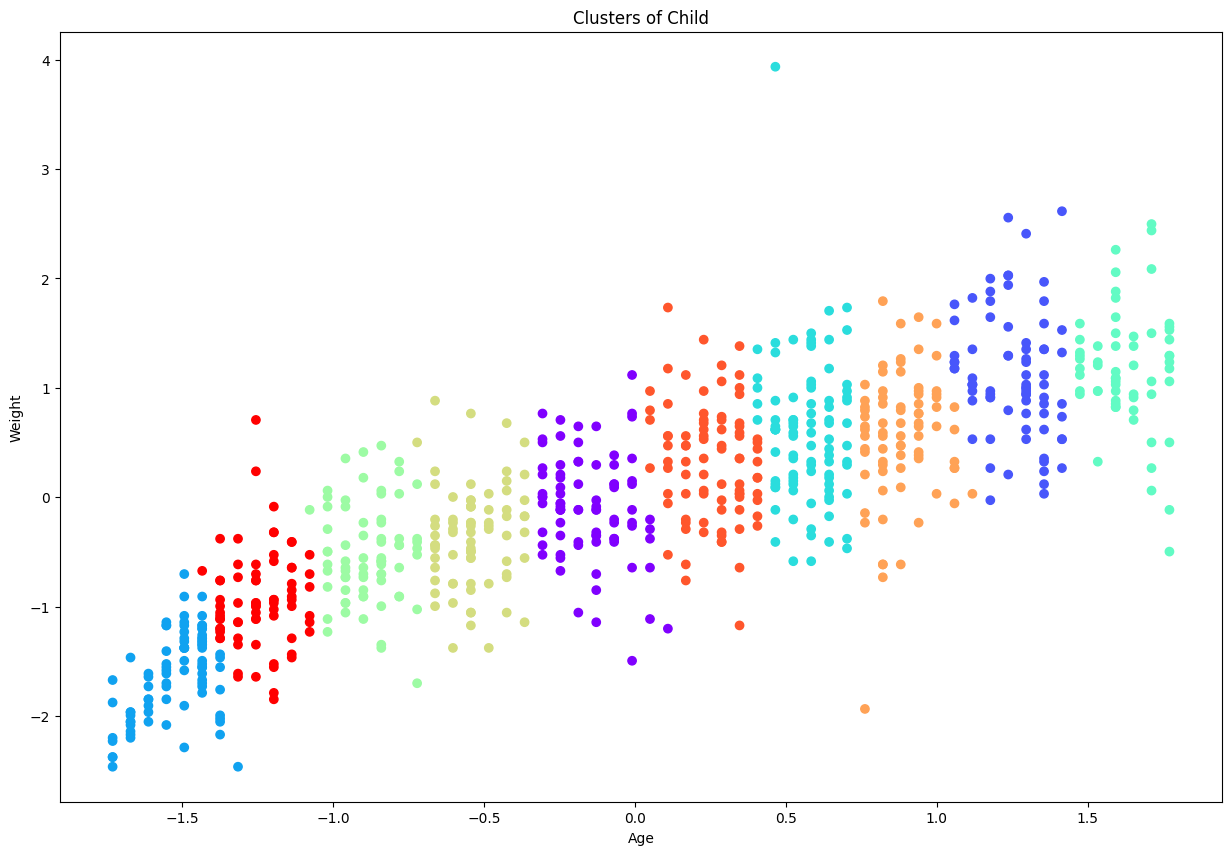

In [70]:
# data visualization
plt.scatter(df['New_Age_after_transformation'],df['New_child weight_after_transformation'],c=y_kmeans,cmap='rainbow')
plt.title('Clusters of Child')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()